In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import scipy.stats as st
from ipywidgets import interact, widgets
import seaborn as sns
from IPython.display import display
from matplotlib.ticker import ScalarFormatter

wine_production_path = "Resources/wine-production.csv"
global_temps_path = "Resources/GlobalLandTemperatures_GlobalLandTemperaturesByCountry.csv"
global_temp_means_path = "Resources/global_temp_means.csv"
us_temp_means_path = "Resources/US_temp_change.csv"

wine_production_data = pd.read_csv(wine_production_path)
global_temps_data = pd.read_csv(global_temps_path)
global_temp_means = pd.read_csv(global_temp_means_path,header = 1)
us_temp_means = pd.read_csv(us_temp_means_path, header = 1)

In [16]:
#Cleaning up global_temp_means by dropping unwanted ranges
columns_drop = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","D-N","DJF","MAM","JJA","SON"]
global_temp_means = global_temp_means.drop(columns = columns_drop)
global_temp_means = global_temp_means.rename(columns = {"J-D":"Annual Mean"})
global_temp_means

,Year,Annual Mean
0,1880,-.17
1,1881,-.09
2,1882,-.11
3,1883,-.18
4,1884,-.28
...,...,...
139,2019,.98
140,2020,1.02
141,2021,.85
142,2022,.89


In [17]:
#Convert annual mean to float
#Convert annual mean from Celcius to Fahrenheit 
global_temp_means['Annual Mean'] = pd.to_numeric(global_temp_means['Annual Mean'], errors='coerce').astype('float')
global_temp_means['Annual Mean °F'] = global_temp_means['Annual Mean']*9/5
global_temp_means_f = global_temp_means.drop(columns=['Annual Mean'])
global_temp_means_f.to_csv("Resources/global_temp_means_f.csv")
global_temp_means_f


,Year,Annual Mean °F
0,1880,-0.306
1,1881,-0.162
2,1882,-0.198
3,1883,-0.324
4,1884,-0.504
...,...,...
139,2019,1.764
140,2020,1.836
141,2021,1.530
142,2022,1.602


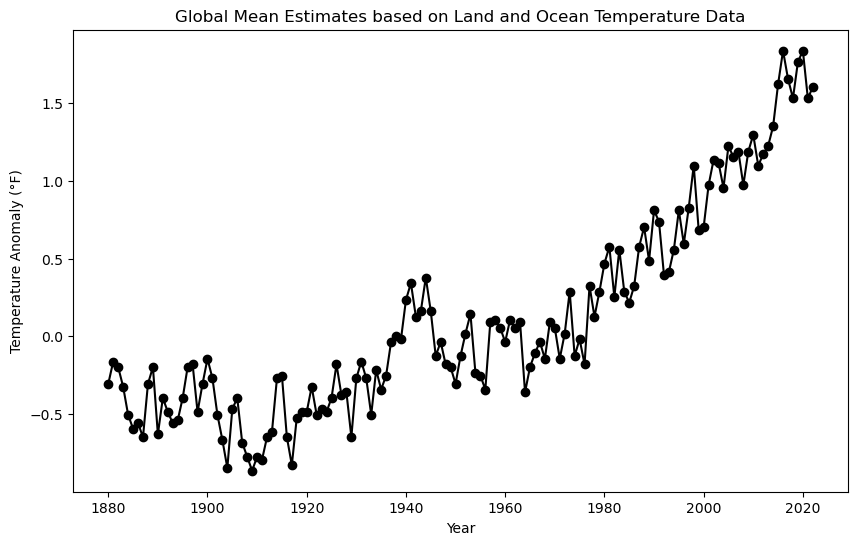

In [18]:
#Setting Temperature Change X and Y values 
x_values = global_temp_means_f['Year']
y_values = global_temp_means_f['Annual Mean °F']

# Plotting Temperature Change line graph 
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='black')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°F)')
plt.title('Global Mean Estimates based on Land and Ocean Temperature Data')

# Displaying the Temperature Change line graph
plt.savefig("Resources/Fig1.png")
plt.show()


In [19]:
#Converting Wine Data from Tonnes to Tons
wine_production_data['Wine | 00000564 || Production | 005510 || tonnes'] = (wine_production_data['Wine | 00000564 || Production | 005510 || tonnes'] * 0.90718474).round(2)
wine_production_data

,Entity,Code,Year,Wine | 00000564 || Production | 005510 || tonnes
0,Africa,NaN,1961,1852404.11
1,Africa,NaN,1962,2025007.80
2,Africa,NaN,1963,1878570.94
3,Africa,NaN,1964,1684229.29
4,Africa,NaN,1965,2168052.69
...,...,...,...,...
5552,Zimbabwe,ZWE,2009,1587.57
5553,Zimbabwe,ZWE,2010,1587.57
5554,Zimbabwe,ZWE,2011,1587.57
5555,Zimbabwe,ZWE,2012,1587.57


In [20]:
#Renaming Column 
wine_production_data = wine_production_data.rename(columns = {"Wine | 00000564 || Production | 005510 || tonnes":"Wine Production (tons)"})
wine_production_data = wine_production_data.dropna(subset=['Code'])
wine_production_data

,Entity,Code,Year,Wine Production (tons)
120,Albania,ALB,1961,3229.58
121,Albania,ALB,1962,4145.83
122,Albania,ALB,1963,2078.36
123,Albania,ALB,1964,2784.15
124,Albania,ALB,1965,3643.25
...,...,...,...,...
5552,Zimbabwe,ZWE,2009,1587.57
5553,Zimbabwe,ZWE,2010,1587.57
5554,Zimbabwe,ZWE,2011,1587.57
5555,Zimbabwe,ZWE,2012,1587.57


In [21]:
#Pivot Table 
wine_pivot_data = wine_production_data.pivot(index='Year', columns='Entity', values='Wine Production (tons)')
wine_pivot_data

Entity,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Belarus,Belgium,Bolivia,...,USSR,Ukraine,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,World,Yugoslavia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1961,3229.58,1236668.79,1519534.44,NaN,139235.62,108408.58,NaN,NaN,NaN,580.60,...,768839.07,NaN,NaN,582078.76,68098.73,NaN,NaN,19497455.74,386460.70,NaN
1962,4145.83,1360777.11,1739254.58,NaN,172121.98,82190.94,NaN,NaN,NaN,580.60,...,915349.40,NaN,NaN,630597.72,63731.54,NaN,NaN,25589442.58,467200.14,NaN
1963,2078.36,1140805.68,1881864.02,NaN,123280.96,149141.17,NaN,NaN,NaN,580.60,...,1075467.51,NaN,NaN,666668.29,76404.01,NaN,NaN,22792421.48,535239.00,NaN
1964,2784.15,950460.17,1772003.95,NaN,154801.10,257655.89,NaN,NaN,NaN,580.60,...,1152850.37,NaN,NaN,662599.57,70941.85,NaN,NaN,25438472.53,530703.07,NaN
1965,3643.25,1272417.32,1657517.24,NaN,160480.98,125860.09,NaN,NaN,NaN,580.60,...,1214548.00,NaN,NaN,753778.89,78691.02,NaN,NaN,25485130.85,467200.14,NaN
1966,4324.55,618907.74,1988276.79,NaN,140733.38,131867.47,NaN,NaN,NaN,580.60,...,1438695.21,NaN,NaN,665868.16,75931.36,NaN,NaN,24279130.35,516188.12,NaN
1967,5600.96,584777.63,2555630.13,NaN,171206.63,235358.19,NaN,NaN,NaN,580.60,...,1632914.39,NaN,NaN,707615.89,75931.36,NaN,NaN,25584389.56,474457.62,NaN
1968,6522.66,902648.82,1770189.58,NaN,182411.26,224731.43,NaN,NaN,NaN,580.60,...,1734990.82,NaN,NaN,736540.57,75931.36,NaN,NaN,25482449.22,551568.32,NaN
1969,9180.71,790203.27,1625312.18,NaN,213525.89,205502.74,NaN,NaN,NaN,580.60,...,2179121.25,NaN,NaN,927634.50,68946.04,NaN,NaN,24847046.14,640445.21,NaN


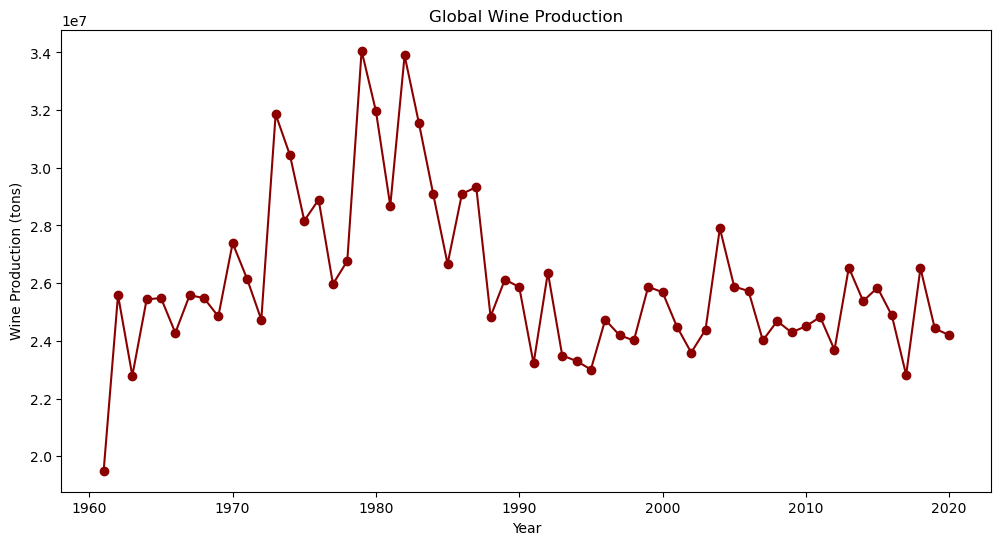

In [22]:
#Plot Global Wine Production 
global_wine_production = wine_production_data[wine_production_data['Entity'] == 'World']
plt.figure(figsize=(12, 6))
plt.plot(global_wine_production['Year'], global_wine_production['Wine Production (tons)'], marker='o', linestyle='-', color='darkred')
plt.title('Global Wine Production')
plt.xlabel('Year')
plt.ylabel('Wine Production (tons)')
plt.show()


In [23]:
#Merge Data
merged_wine_temp = pd.merge(global_wine_production.drop(columns='Code'), global_temp_means_f, on='Year', how='inner')
merged_wine_temp

,Entity,Year,Wine Production (tons),Annual Mean °F
0,World,1961,19497455.74,0.108
1,World,1962,25589442.58,0.054
2,World,1963,22792421.48,0.090
3,World,1964,25438472.53,-0.360
4,World,1965,25485130.85,-0.198
5,World,1966,24279130.35,-0.108
6,World,1967,25584389.56,-0.036
7,World,1968,25482449.22,-0.144
8,World,1969,24847046.14,0.090
9,World,1970,27389055.80,0.054


In [31]:
#Wine Production in million tons 
merged_wine_temp['Wine Production (million tons)'] = merged_wine_temp['Wine Production (tons)'] / 1e6
merged_wine_temp

,Entity,Year,Wine Production (tons),Annual Mean °F,Wine Production (million tons)
0,World,1961,19497455.74,0.108,19.497456
1,World,1962,25589442.58,0.054,25.589443
2,World,1963,22792421.48,0.090,22.792421
3,World,1964,25438472.53,-0.360,25.438473
4,World,1965,25485130.85,-0.198,25.485131
5,World,1966,24279130.35,-0.108,24.279130
6,World,1967,25584389.56,-0.036,25.584390
7,World,1968,25482449.22,-0.144,25.482449
8,World,1969,24847046.14,0.090,24.847046
9,World,1970,27389055.80,0.054,27.389056


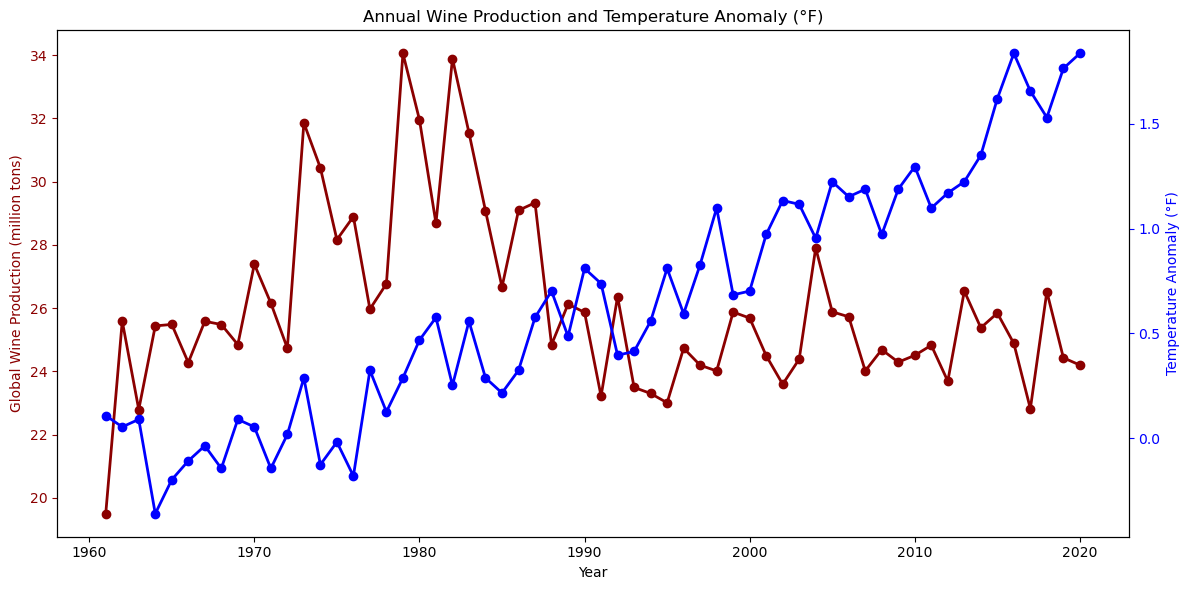

In [32]:
# Plot global wine production by year 
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(merged_wine_temp['Year'], merged_wine_temp['Wine Production (million tons)'],
         linestyle='-', marker='o', color='darkred', linewidth=2, label='Wine Production')
ax1.set_xlabel('Year')
ax1.set_ylabel('Global Wine Production (million tons)', color='darkred')
ax1.tick_params('y', colors='darkred')

# plot temp by year 
ax2 = ax1.twinx()
ax2.plot(merged_wine_temp['Year'], merged_wine_temp['Annual Mean °F'],
         linestyle='-', marker='o', color='blue', linewidth=2, label='Temperature Anomaly')
ax2.set_ylabel('Temperature Anomaly (°F)', color='blue')
ax2.tick_params('y', colors='blue')

# Add title and legend
plt.title('Annual Wine Production and Temperature Anomaly (°F)')
fig.tight_layout()

# Save figure
plt.savefig("../Fig2.png")

# Display plot
plt.show()

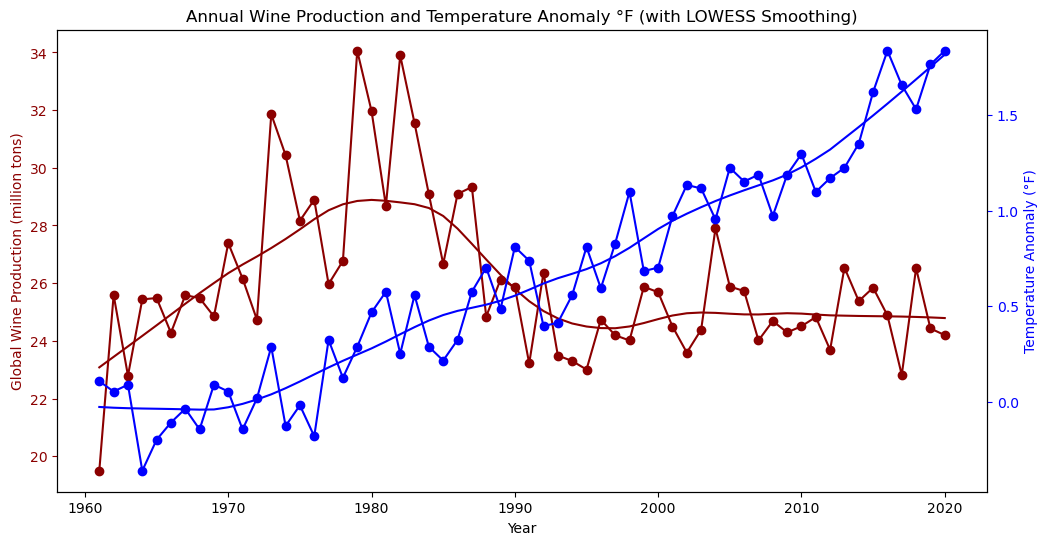

In [34]:
#Plot with LOWESS smoothing 

# LOWESS smoothing
def lowess_smoothing(x, y, frac=0.3):
    return sm.nonparametric.lowess(y, x, frac=frac)

# Apply LOWESS smoothing to wine production and temperature
wine_production_smoothed = lowess_smoothing(merged_wine_temp['Year'], merged_wine_temp['Wine Production (million tons)'])
temp_anomaly_smoothed = lowess_smoothing(merged_wine_temp['Year'], merged_wine_temp['Annual Mean °F'])

# Plot world wine production by year 
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(merged_wine_temp['Year'], merged_wine_temp['Wine Production (million tons)'],
         linestyle='-',marker='o',color='darkred', label='Wine Production')
ax1.plot(wine_production_smoothed[:, 0], wine_production_smoothed[:, 1], 
         linestyle='-', color='darkred', label='Wine Production (Smoothed)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Global Wine Production (million tons)', color='darkred')
ax1.tick_params('y', colors='darkred')

#Plot world temperature by year 
ax2 = ax1.twinx()
ax2.plot(merged_wine_temp['Year'], merged_wine_temp['Annual Mean °F'],
         linestyle='-',marker='o',color='blue', label='Temperature Anomaly')
ax2.plot(temp_anomaly_smoothed[:, 0], temp_anomaly_smoothed[:, 1], 
         linestyle='-', color='blue', label='Temperature Anomaly (Smoothed)')
ax2.set_ylabel('Temperature Anomaly (°F)', color='blue')
ax2.tick_params('y', colors='blue')

# Add title and legend
plt.title('Annual Wine Production and Temperature Anomaly °F (with LOWESS Smoothing)')
plt.savefig("../Fig3.png")


In [35]:
#Convert US Temp Means from Celcius to Fahrenheight 
us_temp_means['Annual_Mean'] = pd.to_numeric(us_temp_means['Annual_Mean'], errors='coerce').astype('float')
us_temp_means['Annual Mean °F'] = us_temp_means['Annual_Mean']*9/5
us_temp_means_f= us_temp_means.drop(columns=['Annual_Mean'])
us_temp_means_f

,Year,Lowess(5),Annual Mean °F
0,1880,-0.18,-0.774
1,1881,-0.23,0.306
2,1882,-0.28,0.000
3,1883,-0.31,-1.206
4,1884,-0.34,-1.206
...,...,...,...
138,2018,1.17,1.584
139,2019,1.13,0.756
140,2020,1.08,2.412
141,2021,1.03,2.520


In [38]:
#Merge US Temp Means F to Global Wine Data 
us_wine_data = wine_production_data[wine_production_data['Entity'] == 'United States']
merged_us_wine_temp= pd.merge(us_wine_data.drop(columns='Code'), us_temp_means_f, on='Year', how='inner')
merged_us_wine_temp

,Entity,Year,Wine Production (tons),Lowess(5),Annual Mean °F
0,United States,1961,582078.76,0.01,0.036
1,United States,1962,630597.72,-0.01,-0.000
2,United States,1963,666668.29,-0.03,0.342
3,United States,1964,662599.57,-0.05,-0.180
4,United States,1965,753778.89,-0.08,-0.198
5,United States,1966,665868.16,-0.13,-0.360
6,United States,1967,707615.89,-0.16,-0.144
7,United States,1968,736540.57,-0.18,-0.522
8,United States,1969,927634.50,-0.18,-0.378
9,United States,1970,878858.80,-0.15,-0.270


In [39]:
#Convert tonne to ton 
merged_us_wine_temp['Wine Production (tons)'] = (merged_us_wine_temp['Wine Production (tons)'] * 0.90718474).round(2)
merged_us_wine_temp

,Entity,Year,Wine Production (tons),Lowess(5),Annual Mean °F
0,United States,1961,528052.97,0.01,0.036
1,United States,1962,572068.63,-0.01,-0.000
2,United States,1963,604791.30,-0.03,0.342
3,United States,1964,601100.22,-0.05,-0.180
4,United States,1965,683816.71,-0.08,-0.198
5,United States,1966,604065.43,-0.13,-0.360
6,United States,1967,641938.34,-0.16,-0.144
7,United States,1968,668178.37,-0.18,-0.522
8,United States,1969,841535.86,-0.18,-0.378
9,United States,1970,797287.29,-0.15,-0.270


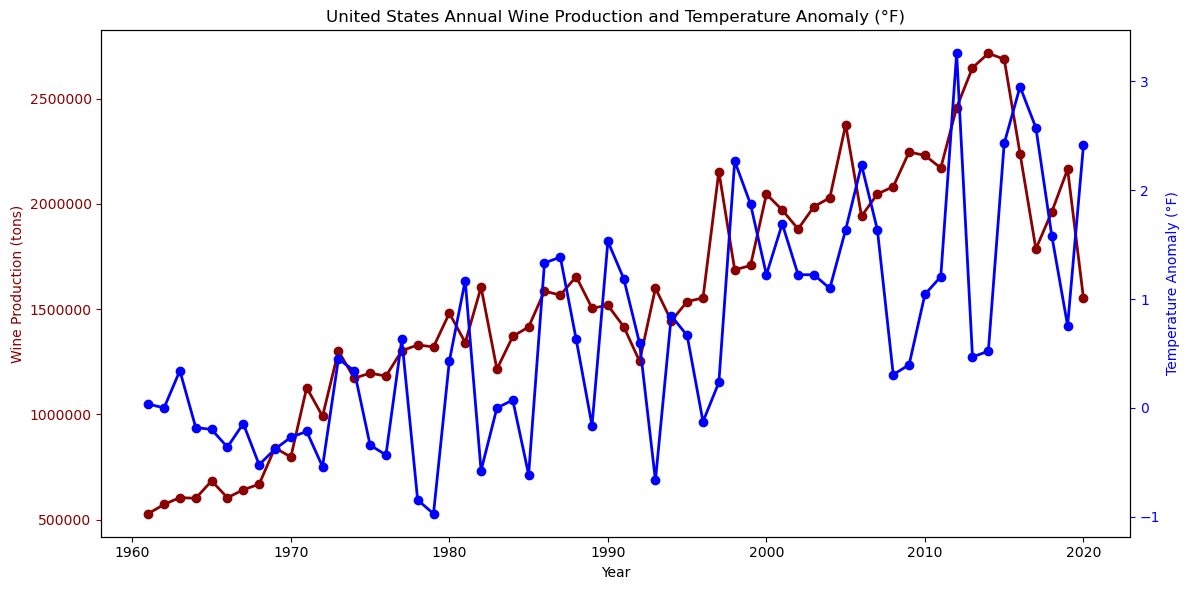

In [40]:
# Plot US wine production by year 
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(merged_us_wine_temp['Year'], merged_us_wine_temp['Wine Production (tons)'],
         linestyle='-', marker='o', color='darkred', linewidth=2, label='Wine Production (tons)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Wine Production (tons)', color='darkred')
ax1.tick_params('y', colors='darkred')

# Plot US temp by year 
ax2 = ax1.twinx()
ax2.plot(merged_us_wine_temp['Year'], merged_us_wine_temp['Annual Mean °F'],
         linestyle='-', marker='o', color='blue', linewidth=2, label='Temperature Anomaly')
ax2.set_ylabel('Temperature Anomaly (°F)', color='blue')
ax2.tick_params('y', colors='blue')

#disable scientific notation
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')

# Add title and ledgend 
plt.title('United States Annual Wine Production and Temperature Anomaly (°F)')
fig.tight_layout()

# Save the figure
plt.savefig("../Fig4.png")

# Display the plot
plt.show()

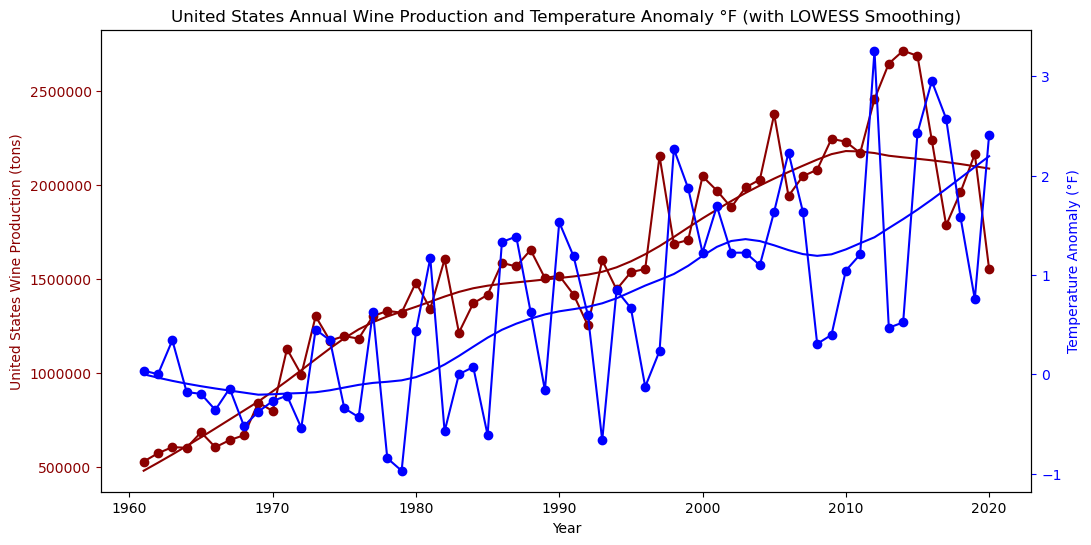

In [42]:
# LOWESS smoothing 
def lowess_smoothing(x, y, frac=0.3):
    return sm.nonparametric.lowess(y, x, frac=frac)
wine_production_smoothed = lowess_smoothing(merged_us_wine_temp['Year'], merged_us_wine_temp['Wine Production (tons)'])
temp_anomaly_smoothed = lowess_smoothing(merged_us_wine_temp['Year'], merged_us_wine_temp['Annual Mean °F'])

#Plot US wine production by year. 
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(merged_us_wine_temp['Year'], merged_us_wine_temp['Wine Production (tons)'],
         linestyle='-',marker='o',color='darkred', label='Wine Production')
ax1.plot(wine_production_smoothed[:, 0], wine_production_smoothed[:, 1], 
         linestyle='-', color='darkred', label='Wine Production (Smoothed)')
ax1.set_xlabel('Year')
ax1.set_ylabel('United States Wine Production (tons)', color='darkred')
ax1.tick_params('y', colors='darkred')

#disable scientific notation
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')

# Plot US Temp by year 
ax2 = ax1.twinx()
ax2.plot(merged_us_wine_temp['Year'], merged_us_wine_temp['Annual Mean °F'],
         linestyle='-',marker='o',color='blue', label='Temperature Anomaly')
ax2.plot(temp_anomaly_smoothed[:, 0], temp_anomaly_smoothed[:, 1], 
         linestyle='-', color='blue', label='Temperature Anomaly (Smoothed)')
ax2.set_ylabel('Temperature Anomaly (°F)', color='blue')
ax2.tick_params('y', colors='blue')

# Add title and legend
plt.title('United States Annual Wine Production and Temperature Anomaly °F (with LOWESS Smoothing)')
plt.savefig("../Fig5.png")